In [18]:

# first neural network with keras make predictions
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.data.txt', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)


In [42]:
predictors = ["num_pregnant", 
              "blood_glucose",
              "diastolic_blood_pressure",
              "tricep_skin_thickness",
              "insulin",
              "bmi",
              "diabetes_pedigree_function",
              "age"]

## Using shap for feature importance

Shapley values calculate the importance of a feature by comparing what a model predicts with and without the feature. However, since the order in which a model sees features can affect its predictions, this is done in every possible order, so that the features are fairly compared.

In short, SHAP computes the average marginal contribution towards the prediction of each feature across all feature permutations.


Further readings:
1. Accessible overview on towardsdatascience:https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d and https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
2. Really good resource with more details and formalisms: https://christophm.github.io/interpretable-ml-book/pdp.html#examples
2. Scientific paper by inventors: https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf
3. Documentation with links to examples: https://github.com/slundberg/shap


In [43]:
import shap

# DF, based on which importance is checked
X_importance = X

# Explain model predictions using shap library:
background = X[np.random.choice(X.shape[0], 100, replace=False)]

explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(X_importance)

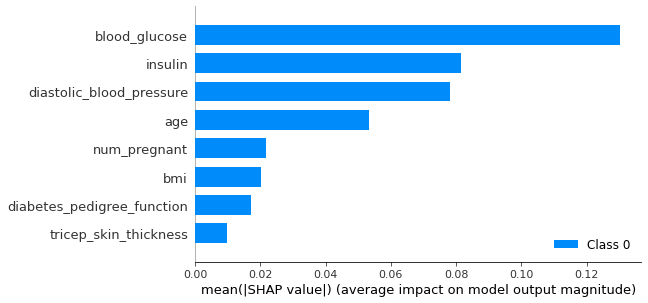

In [50]:
shap.summary_plot(shap_values, X_importance, predictors, len(predictors))

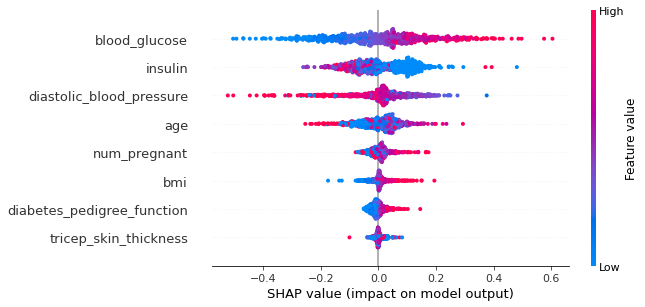

In [51]:
shap.summary_plot(shap_values[0], X_importance, predictors, len(predictors))

Average impact on the prediction made by the model. Plots are the same, only one shows the breakdown for the controbution broken down for the different classes, the top one for class 0.

We see that blood glucose is the most important predictor accross both classes. diastolic_blood_pressure is particularly important fr predicting class 0.

# Looking at non-linear contributions and interaction effects

## Notes on interpretation:
* Each point is a prediction.
* Y-coordinate indicates SHAP value, i.e. average marginal contribution of feature to prediction
* X-coordinate indicates value of feature
* The color represents the value of some other features, as defined on the right-side of the plot. The feature is selected because it is deemed to be the one with the strongest interaction effects with the current feature.
* Vertical spread along a singe x-value indicates that interactions (i.e. the value of other features) are important in explaining the effect of the feature.

In [73]:
shap_values[0][:,0].shape

(768,)

In [58]:
top_inds.shape

(768, 8)

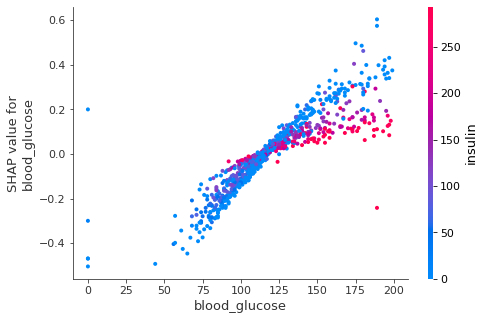

In [76]:
# sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the X_importance dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values[0]), axis=0))

# make SHAP plots
i=0
shap.dependence_plot(top_inds[i], shap_values[0], X, feature_names=predictors)

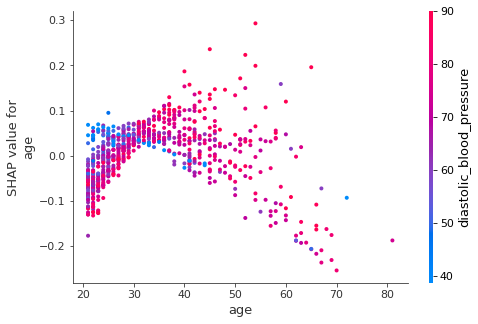

In [79]:
i+=1
shap.dependence_plot(top_inds[i], shap_values[0], X, feature_names=predictors)

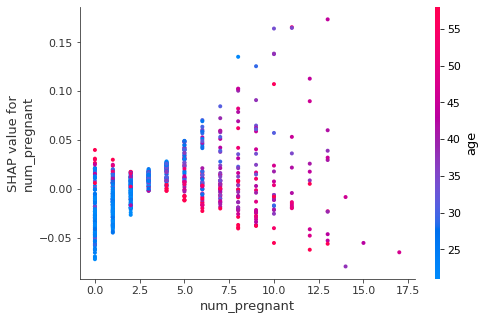

In [80]:
i+=1
shap.dependence_plot(top_inds[i], shap_values[0], X, feature_names=predictors)

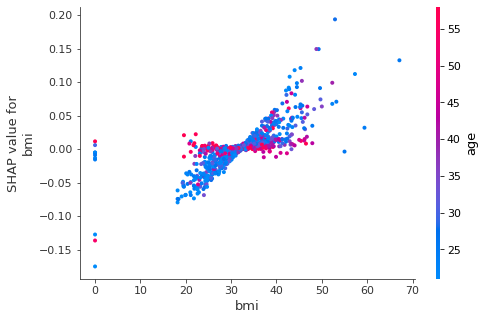

In [81]:
i+=1
shap.dependence_plot(top_inds[i], shap_values[0], X, feature_names=predictors)

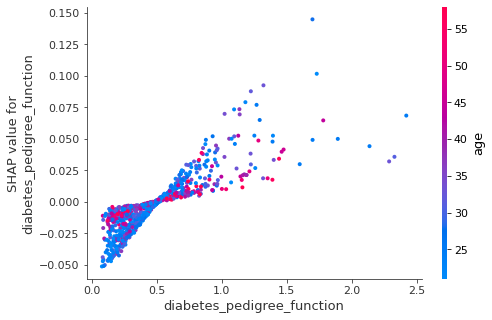

In [82]:
i+=1
shap.dependence_plot(top_inds[i], shap_values[0], X, feature_names=predictors)

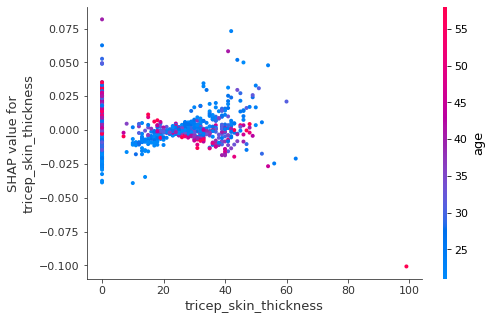

In [83]:
i+=1
shap.dependence_plot(top_inds[i], shap_values[0], X, feature_names=predictors)

In [87]:
# load JS visualization code to notebook
shap.initjs()

# visualize the row_numbers prediction's explanation (use matplotlib=True to avoid Javascript)
def force_plot(row_number):
    return shap.force_plot(explainer.expected_value[0], shap_values[0][row_number], predictors)

force_plot(100)

TypeError: Object of type EagerTensor is not JSON serializable